# Chapter 16 - Clustering

# 16.2 K - means 

In [1]:
import pandas as pd

In [2]:
# Let's import data

wine = pd.read_csv("C:/Users/adri_/Documents/GitHub- Adriana/Pandas for everyone/data/wine.csv")
wine

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# We will drop the cultivar column as it correlates too closely with the actual clusters
wine = wine.drop("Cultivar", axis = 1)
wine


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# sklearn has the k-mena algorithm

from sklearn.cluster import KMeans


In [5]:
# Create 3 clusters (k = 3)
# Use a random seed of 42 as an example. This part can be ignored in real situations.


kmeans = KMeans(n_clusters = 3, random_state = 42).fit(wine.values)
kmeans


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [6]:
import numpy as np
np.unique(kmeans.labels_, return_counts = True)

(array([0, 1, 2]), array([62, 47, 69], dtype=int64))

In [7]:
# we can turn these labels into a dataframe

kmeans_3 = pd.DataFrame(kmeans.labels_, columns = ["cluster"])
kmeans_3

,cluster
0,1
1,1
2,1
3,1
4,0
...,...
173,0
174,0
175,0
176,0


# 16.2.1 Dimension reduction with PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
# We tell PCA how many dimensions we want to project. Here we will project 2 dimensions

pca = PCA(n_components = 2).fit(wine)

In [10]:
# transform our data into the new space
pca_trans = pca.transform(wine)


In [11]:
# give our projections a name
pca_trans_df = pd.DataFrame(pca_trans,columns = ["pca1", "pca2"])


In [12]:
# Concatenate the data
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis = 1)
kmeans_3

,cluster,pca1,pca2
0,1,318.562979,21.492131
1,1,303.097420,-5.364718
2,1,438.061133,-6.537309
3,1,733.240139,0.192729
4,0,-11.571428,18.489995
...,...,...,...
173,0,-6.980211,-4.541137
174,0,3.131605,2.335191
175,0,88.458074,18.776285
176,0,93.456242,18.670819


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

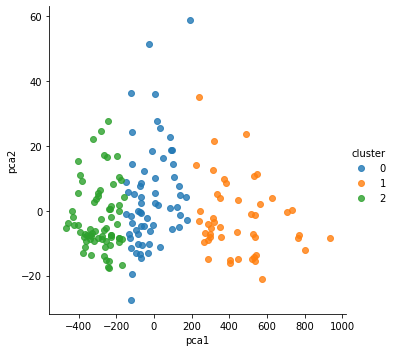

In [36]:
# Plotting k-means using Pricipal Component Analysis(PCA)
fig = sns.lmplot(x = "pca1", y = "pca2", data = kmeans_3, hue = "cluster", fit_reg = False)
plt.show()

In [43]:
# in this other simulation, we will load the original Wine data and and eep the cultivar column

wine_all = wine = pd.read_csv("C:/Users/adri_/Documents/GitHub- Adriana/Pandas for everyone/data/wine.csv")
wine_all

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [47]:
# we will run PCA in our data and compare the clusters from PCA and the variable Cultivar

# Model
pca_all = PCA(n_components = 2).fit(wine_all)

# transform our data into the new space
pca_all_trans = pca_all.transform(wine_all)

# give our projections a name
pca_all_trans_df = pd.DataFrame(pca_all_trans,columns = ["pca_all_1", "pca_all_2"])

# Concatenate the data
kmeans_3 = pd.concat([kmeans_3, pca_all_trans_df, wine_all["Cultivar"]], axis = 1)
kmeans_3

,cluster,pca1,pca2,pca_all_1,pca_all_2,Cultivar
0,1,318.562979,21.492131,318.564055,21.490773,1
1,1,303.097420,-5.364718,303.098514,-5.366083,1
2,1,438.061133,-6.537309,438.062063,-6.537986,1
3,1,733.240139,0.192729,733.240711,0.193320,1
4,0,-11.571428,18.489995,-11.569952,18.487255,1
...,...,...,...,...,...,...
173,0,-6.980211,-4.541137,-6.981858,-4.538116,3
174,0,3.131605,2.335191,3.129945,2.338236,3
175,0,88.458074,18.776285,88.456310,18.779644,3
176,0,93.456242,18.670819,93.454472,18.674180,3


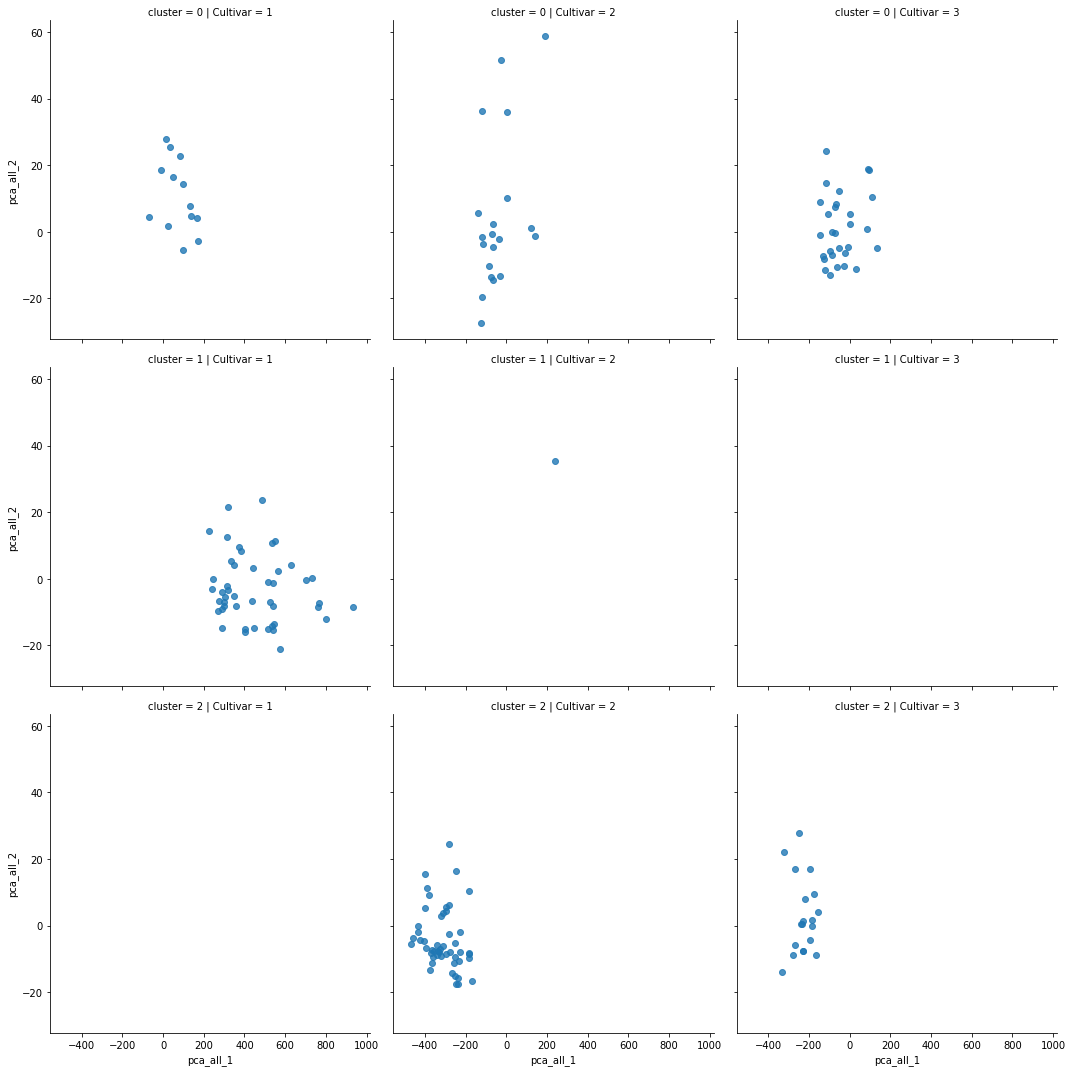

In [49]:
# We can compare the groupings by faceting the plot

with sns.plotting_context(font_scale = 5):
    fig = sns.lmplot(x="pca_all_1", 
                     y="pca_all_2", 
                     data = kmeans_3, 
                     row = "cluster", 
                     col="Cultivar", 
                     fit_reg = False)
plt.show()

In [50]:
# Alternatively we can look at the cross-tabulated count
pd.crosstab(kmeans_3["cluster"], kmeans_3["Cultivar"], margins = True)


Cultivar,1,2,3,All
cluster,,,,
0,13,20,29,62
1,46,1,0,47
2,0,50,19,69
All,59,71,48,178


# 16.3 Hierarchical Clustering

In [51]:
from scipy.cluster import hierarchy

In [ ]:
# Let's import data

wine = pd.read_csv("C:/Users/adri_/Documents/GitHub- Adriana/Pandas for everyone/data/wine.csv")
wine

In [52]:
# We will drop the cultivar column 
wine = wine.drop("Cultivar", axis = 1)
wine


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [54]:
# we can use the matplotlib to see the different formulations
import matplotlib.pyplot as plt



# 16.3.1 Complete clustering

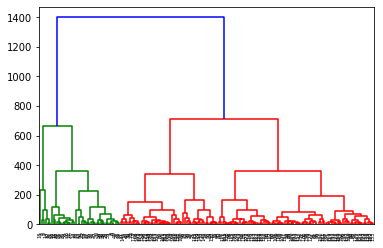

In [59]:
wine_complete = hierarchy.complete(wine)
fig=plt.figure()
dn = hierarchy.dendrogram(wine_complete)
plt.show()

# 16.3.2 Single clustering

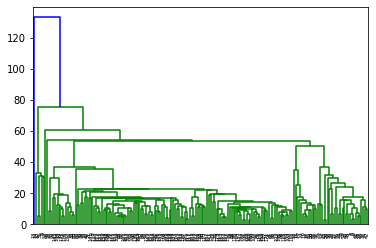

In [60]:
wine_single = hierarchy.single(wine)
fig=plt.figure()
dn = hierarchy.dendrogram(wine_single)
plt.show()

# 16.3.3 Average clustering

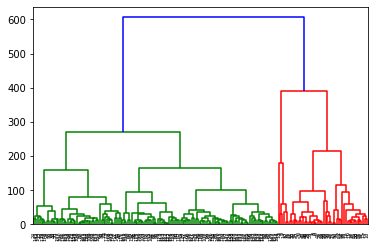

In [61]:
wine_average = hierarchy.average(wine)
fig=plt.figure()
dn = hierarchy.dendrogram(wine_average)
plt.show()

# 16.3.4 Centroid Clustering

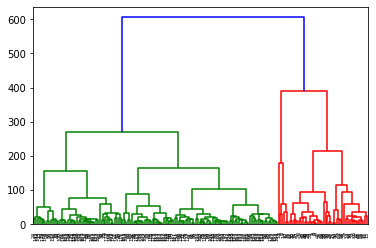

In [62]:
wine_centroid = hierarchy.centroid(wine)
fig=plt.figure()
dn = hierarchy.dendrogram(wine_centroid)
plt.show()

# 16.3.5 Manually setting the threshold

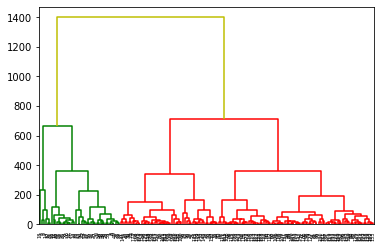

In [63]:
wine_complete = hierarchy.complete(wine)
fig=plt.figure()
dn = hierarchy.dendrogram(wine_complete, color_threshold = 0.7 * max(wine_complete[:,2]), above_threshold_color = "y")
plt.show()